In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

In [20]:
def plot_distrib1(xc,count_c):
    with plt.style.context('fivethirtyeight'): 
        plt.figure(figsize=(17,5))
        plt.plot(xc,count_c, ls='--', lw=1, c='b')
        wi = np.diff(xc)[0]*0.95
        plt.bar (xc, count_c, color='gold', width=wi, alpha=0.7, label='Histogram of data')
        plt.title('Arbitrary discrete distribution', fontsize=25, fontweight='bold')
        plt.show()
    return

In [21]:
def plot_line(X,Y,x,y):
    with plt.style.context('fivethirtyeight'):
        fig, ax1 = plt.subplots(figsize=(17,5))
        ax1.plot(X,Y, 'mo-', lw=7, label='discrete CDF', ms=20)
        ax1.legend(loc=6, frameon=False)
        ax2 = ax1.twinx()
        ax2.plot(x,y, 'co-', lw=7, label='discrete PDF', ms=20)
        ax2.legend(loc=7, frameon=False)
        ax1.set_ylabel('CDF-axis');  ax2.set_ylabel('PDF-axis'); 
        plt.title('CDF and PDF', fontsize=25, fontweight='bold')       
        plt.show()   

In [22]:
def plot_distrib3(X):
    with plt.style.context('fivethirtyeight'): 
        plt.figure(figsize=(17,5))     
        plt.bar(xc, X ,color='blue', width=0.005, label='resampled PDF')
        plt.plot(xc, np.zeros_like(X) ,color='magenta', ls='-',lw=13, alpha=0.6)
        plt.plot(xc,myPDF, 'co-', lw=7, label='discrete PDF', ms=20, alpha=0.5)
        plt.title('Reconstruction of the discrete PDF distribution', fontsize=25, fontweight='bold')
        plt.legend(loc='upper center', frameon=False)
        plt.show()

In [23]:
prev = 0.7
NP = 10000
nI =  round(NP*prev)
nH = NP-nI

In [24]:
#--- generate the data ---
value_h = np.random.beta(2, 9, nH)
value_i = np.random.beta(5, 1, nI)
value_c = np.concatenate((value_h, value_i))

In [25]:
#--- analyse the data, compute the middle of the data classes (bins)---
nBins=30
count_c, bins_c, = np.histogram(value_c, bins=nBins)
myPDF = count_c/np.sum(count_c)
dxc = np.diff(bins_c)[0];   xc = bins_c[0:-1] + 0.5*dxc

In [26]:
dxc

0.033276385043419475

In [27]:
xc

array([0.01826898, 0.05154536, 0.08482175, 0.11809813, 0.15137452,
       0.1846509 , 0.21792729, 0.25120367, 0.28448006, 0.31775644,
       0.35103283, 0.38430921, 0.4175856 , 0.45086198, 0.48413837,
       0.51741475, 0.55069114, 0.58396752, 0.61724391, 0.65052029,
       0.68379668, 0.71707306, 0.75034945, 0.78362583, 0.81690222,
       0.8501786 , 0.88345499, 0.91673137, 0.95000776, 0.98328414])

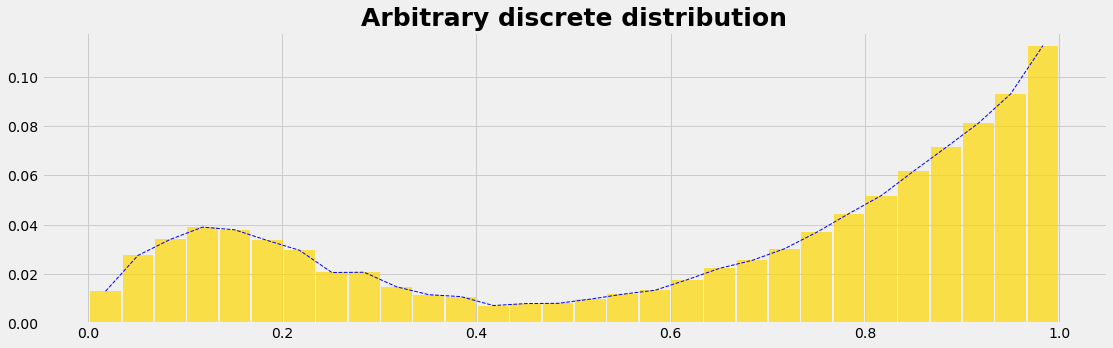

In [28]:
plot_distrib1(xc,myPDF);

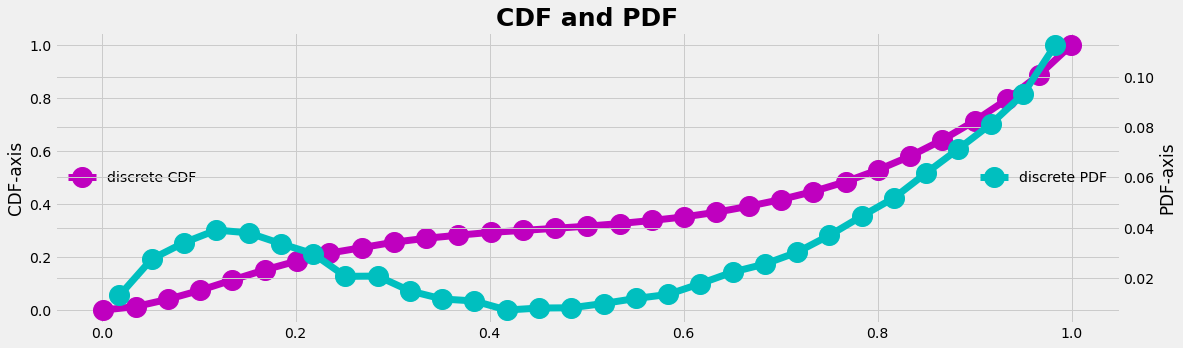

In [29]:
#--- compute the CDF ----
myCDF = np.zeros_like(bins_c)
myCDF[1:] = np.cumsum(myPDF)
plot_line(bins_c,myCDF,xc,myPDF)

In [34]:
def get_sampled_element():
    a = np.random.uniform(0, 1)
    return np.argmax(myCDF>=a)-1

def run_sampling(myCDF, nRuns=5000):
    X = np.zeros_like(myPDF,dtype=int)
    for k in np.arange(nRuns):
        X[get_sampled_element()] += 1
    return X, X/np.sum(X)

original_X, X = run_sampling(myCDF)

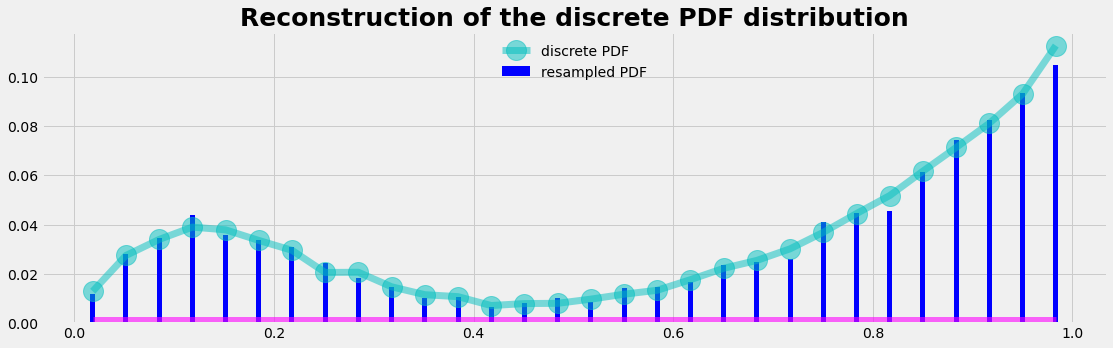

In [35]:
plot_distrib3(X)

In [38]:
original_X

array([ 60, 141, 173, 220, 180, 168, 155, 123,  92,  73,  51,  53,  33,
        42,  52,  44,  71,  73,  83, 119, 125, 131, 206, 223, 228, 307,
       371, 413, 467, 523])

In [39]:
len(original_X)

30